In [29]:
import pandas as pd
import os
from openpyxl import load_workbook
import numpy as np
import re

In [30]:
df=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\monthly-data.xlsx")
df2=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\monthly-data_only_lagged.xlsx")

In [31]:
import sklearn.preprocessing






In [32]:

df2.index=df['Unnamed: 0']
df2.drop(columns='Unnamed: 0', inplace=True)
df2.head()


df.index=df['Unnamed: 0']
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Malaysia: FPCPITOTLZGMYS (linear),Malaysia: FPCPITOTLZGMYS (time),Malaysia: uncertainty (linear),Malaysia: uncertainty (time),"Malaysia: Population, total","Malaysia: GNI, Atlas method (current US$)",Malaysia: GDP (current US$),"Malaysia: Inflation, GDP deflator (annual %)","Malaysia: Agriculture, forestry, and fishing, value added (% of GDP)","Malaysia: Population, total.1",...,Indonesia: Linear interpolation: Adjusted net national income (current US$)_lag24,Indonesia: Linear interpolation: Adjusted net national income per capita (current US$)_lag24,Indonesia: real_gdp_ind_seas_adj (linear)_lag24,Indonesia: real_gdp_ind_seas_adj (time)_lag24,Indonesia: nominal_gdp_ind_seas_adj (linear)_lag24,Indonesia: nominal_gdp_ind_seas_adj (time)_lag24,Indonesia: real_gdp_ind_non_seas_adj (linear)_lag24,Indonesia: real_gdp_ind_non_seas_adj (time)_lag24,Indonesia: nominal_gdp_ind_non_seas_adj (linear)_lag24,Indonesia: nominal_gdp_ind_non_seas_adj (time)_lag24
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.622852,1.622852,0.184997,0.184997,2.825891e+07,2.126832e+11,2.066541e+11,-4.891667,9.275,2.825971e+07,...,3.141212e+11,1335.813896,1.513323e+06,1.513323e+06,1.259852e+06,1.259852e+06,1.475278e+06,1.475278e+06,1.207305e+06,1.207305e+06
2010-02-01,1.752154,1.741881,0.186439,0.186358,2.830063e+07,2.145252e+11,2.110508e+11,-3.783333,9.350,2.829811e+07,...,3.188089e+11,1354.094994,1.520674e+06,1.520429e+06,1.282677e+06,1.281916e+06,1.495639e+06,1.494961e+06,1.249181e+06,1.247785e+06
2010-03-01,1.881455,1.873662,0.187880,0.187864,2.834234e+07,2.163672e+11,2.154475e+11,-2.675000,9.425,2.834062e+07,...,3.234966e+11,1372.376091,1.528026e+06,1.528026e+06,1.305502e+06,1.305502e+06,1.516001e+06,1.516001e+06,1.291057e+06,1.291057e+06
2010-04-01,2.010757,2.001192,0.189322,0.189322,2.838405e+07,2.182092e+11,2.198442e+11,-1.566667,9.500,2.838176e+07,...,3.281844e+11,1390.657189,1.535378e+06,1.535378e+06,1.328328e+06,1.328328e+06,1.536362e+06,1.536362e+06,1.332933e+06,1.332933e+06
2010-05-01,2.140059,2.132974,0.126215,0.125529,2.842576e+07,2.200511e+11,2.242409e+11,-0.458333,9.575,2.842427e+07,...,3.328721e+11,1408.938287,1.542168e+06,1.542242e+06,1.351049e+06,1.351296e+06,1.559463e+06,1.559714e+06,1.375603e+06,1.376067e+06


In [33]:

l1=[]
l2=[]
for x, y in zip(df.columns, df.iloc[4]):
    if y==0 or str(y)=="nan" or str(y)=="NaN" or str(y)=="na":
        l1.append(x)
        l2.append(y)

for x in l1:
    df.drop(columns=x, inplace=True)

df.Name="Monthly_only_lagged"
df2.Name="Monthly"

    

In [34]:
l1=[]
l2=[]
for x, y in zip(df2.columns, df2.iloc[4]):
    if y==0 or str(y)=="nan" or str(y)=="NaN" or str(y)=="na":
        l1.append(x)
        l2.append(y)

for x in l1:
    df2.drop(columns=x, inplace=True)

In [35]:

df.dropna(inplace=True)
df2.dropna(inplace=True)

df['incidents_per_month'].to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\incm.csv")
df2['incidents_per_month'].to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\incm2.csv")
incm=df['incidents_per_month']
incm2=df2['incidents_per_month']
df.drop(columns='incidents_per_month', inplace=True)
df2.drop(columns='incidents_per_month', inplace=True)

In [55]:
yn=[]
yn2=[]
for x in incm:
    if x==0:
        yn.append(0)
    else:
        yn.append(1)

for x in incm2:
    if x==0:
        yn2.append(0)
    else:
        yn2.append(1)

yn=pd.DataFrame(yn)
yn2=pd.DataFrame(yn2)
yn2.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\yn2.csv")
yn.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\yn.csv")

In [36]:
#scaling (egy minmax tartaléknak, egy robust)
scaler = sklearn.preprocessing.RobustScaler()
robust_df = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns, index=df.index)
robust_df.Name="Robust "+str(df.Name)
robust_df2 = pd.DataFrame(scaler.fit_transform(df2.to_numpy()), columns=df2.columns, index=df2.index)

robust_df2.Name="Robust "+str(df2.Name)

In [37]:
#minmax scaling
scaler = sklearn.preprocessing.MinMaxScaler()
mm_df = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns, index=df.index)

mm_df2 = pd.DataFrame(scaler.fit_transform(df2.to_numpy()), columns=df2.columns, index=df2.index)
mm_df.Name="minmax "+str(df.Name)
mm_df2.Name="minmax "+str(df2.Name)

In [38]:
#standard scaling
scaler = sklearn.preprocessing.StandardScaler()
ss_df = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns, index=df.index)

ss_df2 = pd.DataFrame(scaler.fit_transform(df2.to_numpy()), columns=df2.columns, index=df2.index)
ss_df.Name="standardscaler "+str(df.Name)
ss_df2.Name="standardscaler "+str(df2.Name)

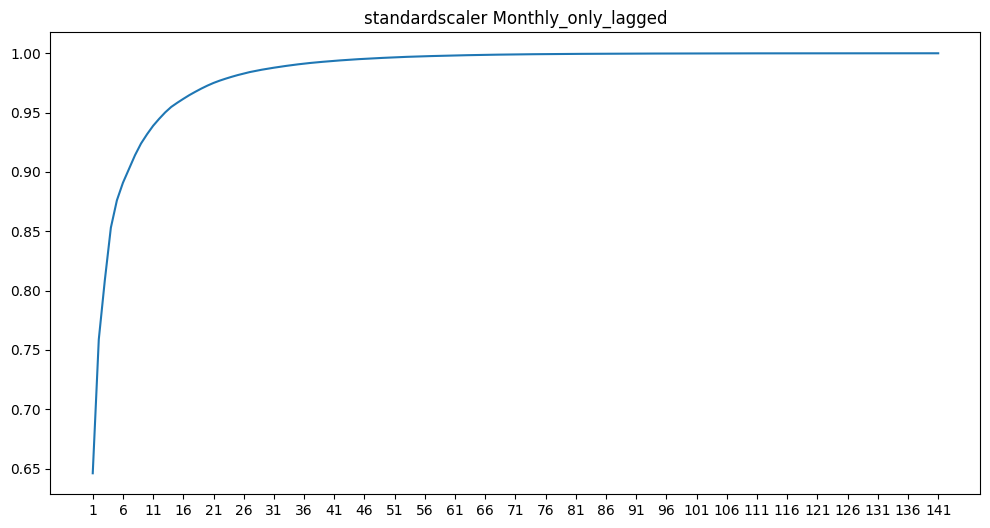

n_components:  20
exp. var ratio:  0.9727696059186312


In [ ]:
#továbbiakban a scaled datával dolgozok
#PCA ss_df
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def pcaa(df):
    df.dropna(inplace=True)

    l=[]
    l2=[]


    for x in range(1, len(df)):

        pca = PCA(n_components=x)
        pca.fit(df)
        pca_data = pca.transform(df)

        l.append(x)
        l2.append(np.sum(pca.explained_variance_ratio_))


        dfa=pd.DataFrame(pca_data, index=df.index)
        dfa

    plt.figure(figsize=(12, 6))
    plt.plot(l, l2)

    plt.xticks(np.arange(min(l), max(l)+1, 5))
    plt.title(label=df.Name)
    plt.show()

a=pcaa(ss_df)
    

ss_df.dropna(inplace=True)
var_ratio =20
pca = PCA(n_components=var_ratio)
pca.fit(ss_df)
pca_data = pca.transform(ss_df)

print('n_components: ', pca.n_components_)
print('exp. var ratio: ', np.sum(pca.explained_variance_ratio_))

ss_df_pca=pd.DataFrame(pca_data, index=ss_df.index)   

 

    

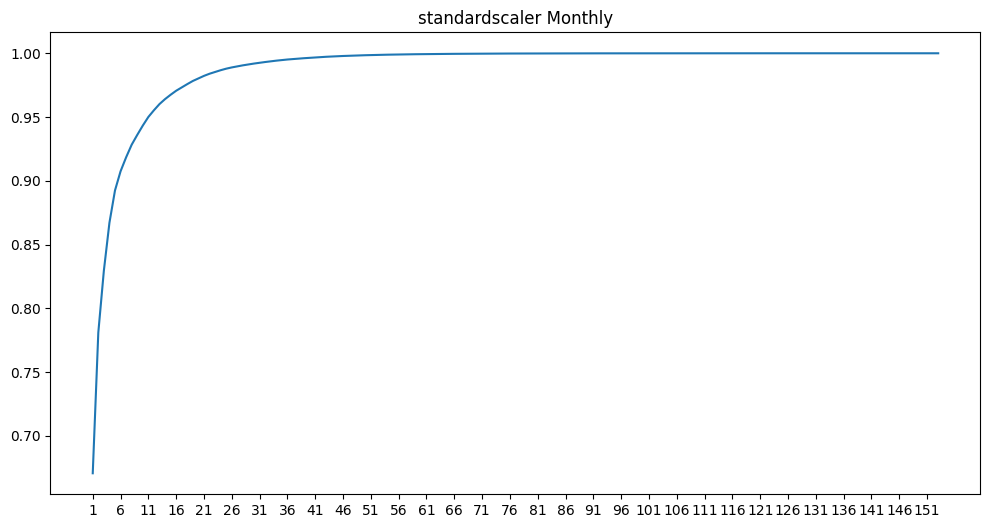

In [40]:
#ss_df2

b=pcaa(ss_df2)
  

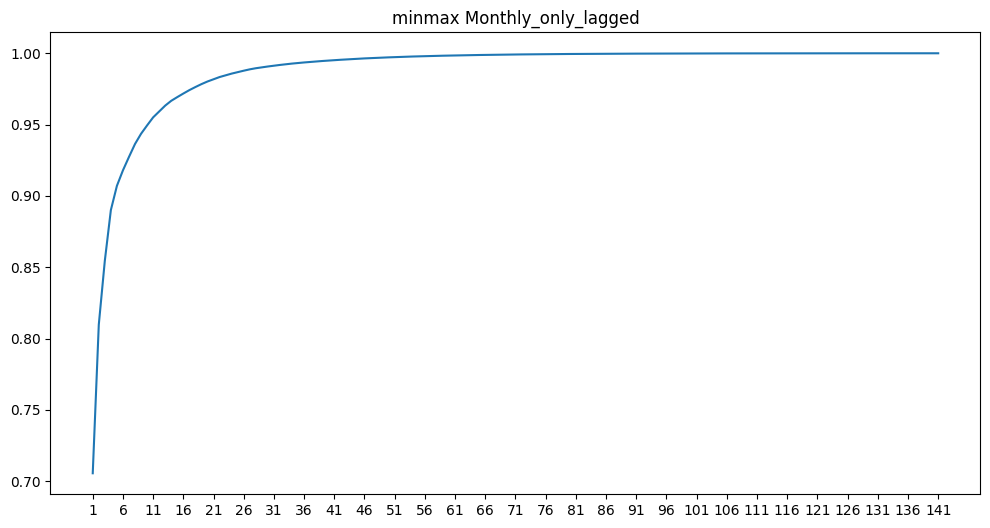

In [41]:
#mm_df
m=pcaa(mm_df)



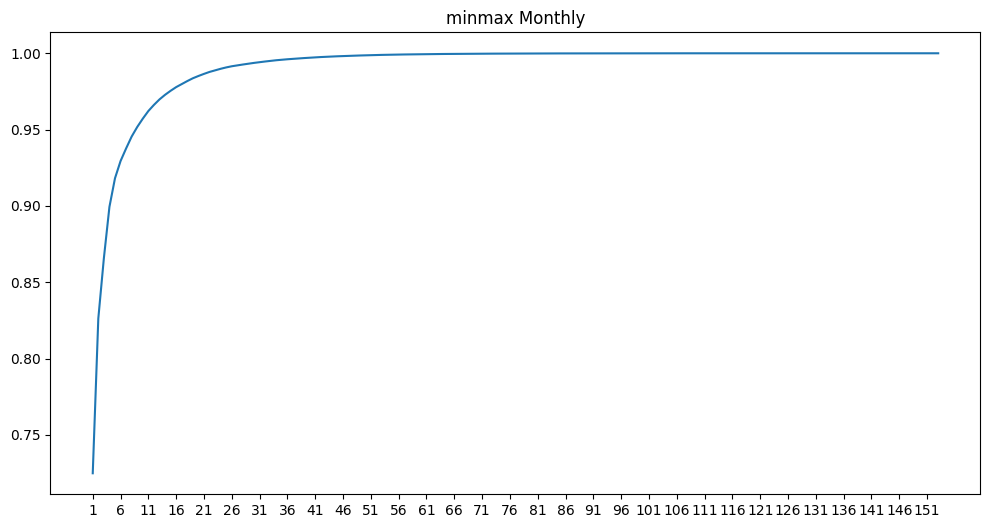

In [42]:
#mm_df2
m2=pcaa(mm_df2)

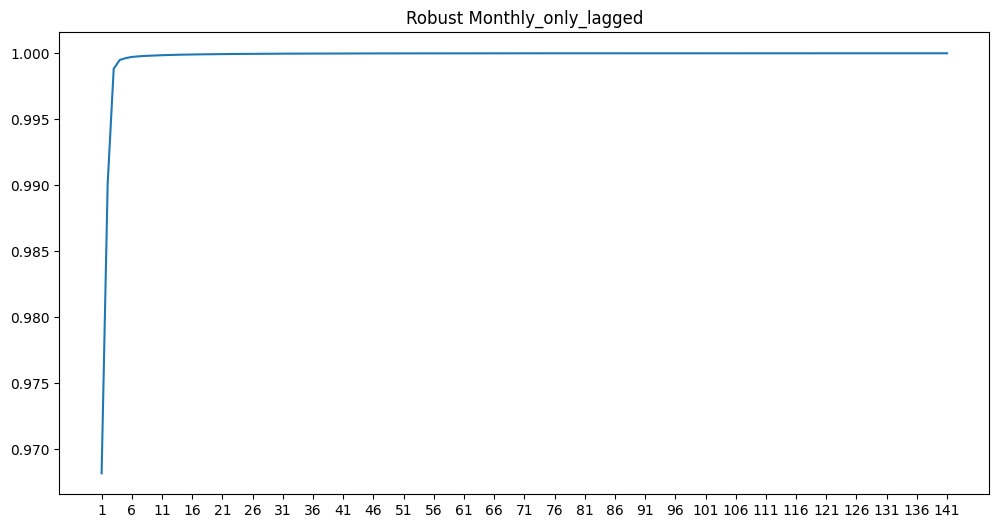

In [43]:
r1=pcaa(robust_df)

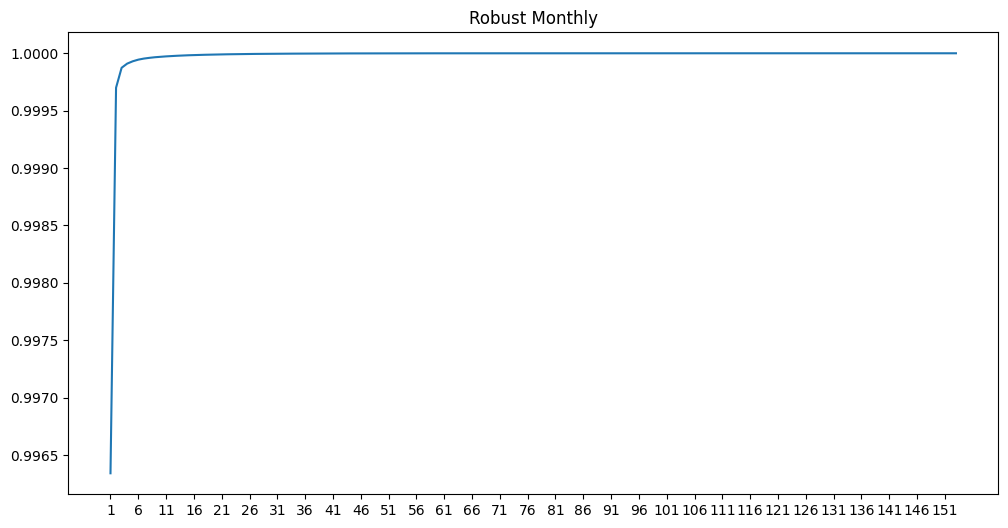

In [44]:
r2=pcaa(robust_df2)

In [45]:
#ideális dimenziószám (PCA szerint)
def vegsodim(df, d):
    df.dropna(inplace=True)
    pca = PCA(n_components=d)
    pca.fit(df)
    pca_data = pca.transform(df)

    print('n_components: ', pca.n_components_)
    print('exp. var ratio: ', np.sum(pca.explained_variance_ratio_))

    df=pd.DataFrame(pca_data, index=df.index)
    return df

ss_df2_pca=vegsodim(ss_df2, 18)
mm_df_pca=vegsodim(mm_df, 18)
mm_df2_pca=vegsodim(mm_df2, 18)
robust_df_pca=vegsodim(robust_df, 3)
robust_df2_pca=vegsodim(robust_df2, 3)




n_components:  18
exp. var ratio:  0.9758266629751055
n_components:  18
exp. var ratio:  0.9763309250850397
n_components:  18
exp. var ratio:  0.981796317311919
n_components:  3
exp. var ratio:  0.998826757393027
n_components:  3
exp. var ratio:  0.9998737240731785


In [46]:
#AE
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import LeakyReLU, Dropout


def auto(data, idealdims):
    input_dim = data.shape[1]
    encoding_dim = idealdims
    input_data = Input(shape=(input_dim,))
    print(encoding_dim)
    dims=[]
    for x in range(0, encoding_dim):
        dims.append("Dimension "+str(x+1))

    x = Dense(64)(input_data)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.1)(x)
    encoded = Dense(encoding_dim)(x)

    x = Dense(64)(encoded)
    x = LeakyReLU(alpha=0.1)(x)
    decoded = Dense(input_dim)(x)

    autoencoder = Model(input_data, decoded)
    encoder = Model(input_data, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    autoencoder.fit(data, data, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=early_stopping)
    encoded_data = encoder.predict(data)

    encoded_df = pd.DataFrame(encoded_data, index=data.index)
    fr=encoded_df.iloc[0]
    if (fr==0).any():
        auto()
    return encoded_df
ss_df_ae=auto(ss_df, 20)
ss_df2_ae=auto(ss_df2, 18)
mm_df_ae=auto(mm_df, 18)
mm_df2_ae=auto(mm_df2, 18)


20


C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.9071 - val_loss: 1.5355
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7933 - val_loss: 1.4759
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6693 - val_loss: 1.3325
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4951 - val_loss: 1.1836
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4064 - val_loss: 1.1208
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3285 - val_loss: 1.0636
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2818 - val_loss: 1.0218
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2727 - val_loss: 1.0469
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2345 - val_loss: 1.0524
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2163 - val_loss: 1.0628
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1969 - val_loss: 1.0644
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1910 - val_lo

C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.8875 - val_loss: 1.5746
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7582 - val_loss: 1.4861
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6717 - val_loss: 1.3301
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4917 - val_loss: 1.1720
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4064 - val_loss: 1.0579
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3510 - val_loss: 0.9950
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2960 - val_loss: 0.9427
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2656 - val_loss: 0.9099
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2524 - val_loss: 0.8826
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2313 - val_loss: 0.8597
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2131 - val_loss: 0.8346
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1978 - val_loss: 0.8122
E

C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.2885 - val_loss: 0.4439
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2460 - val_loss: 0.3211
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1754 - val_loss: 0.2272
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1191 - val_loss: 0.1619
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0812 - val_loss: 0.1328
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0625 - val_loss: 0.1216
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0547 - val_loss: 0.1133
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0476 - val_loss: 0.1018
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0413 - val_loss: 0.0901
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0349 - val_loss: 0.0807
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0298 - val_loss: 0.0732
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0257 - val_loss: 0.0692
E

C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.2774 - val_loss: 0.4502
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2347 - val_loss: 0.3430
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1829 - val_loss: 0.2473
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1323 - val_loss: 0.1860
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0922 - val_loss: 0.1417
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0733 - val_loss: 0.1165
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0601 - val_loss: 0.1103
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0505 - val_loss: 0.1061
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0451 - val_loss: 0.0966
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0398 - val_loss: 0.0923
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0358 - val_loss: 0.0853
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0307 - val_loss: 0.0787
E

In [47]:
robust_df_ae=auto(robust_df, 3)

3
Epoch 1/100


C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 9.5010 - val_loss: 1489.0034
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.4242 - val_loss: 1489.7433
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.0452 - val_loss: 1491.0245
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.5558 - val_loss: 1497.3274
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.0208 - val_loss: 1502.0083
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.4001 - val_loss: 1497.7766
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [48]:
robust_df2_ae=auto(robust_df, 3)

3
Epoch 1/100


C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 9.1218 - val_loss: 1470.7388
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.9928 - val_loss: 1472.0933
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.3505 - val_loss: 1469.4784
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.7677 - val_loss: 1462.9773
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6040 - val_loss: 1455.8165
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.5589 - val_loss: 1445.5813
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.8077 - val_loss: 1429.9586
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.8324 - val_loss: 1407.2384
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.7599 - val_loss: 1381.8469
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.7928 - val_loss: 1354.0674
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.5958 - val_loss: 1321.5804
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - 

In [49]:
#export


ss_df.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\ss_df.csv")
ss_df2.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\ss_df2.csv")
mm_df.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\mm_df.csv")
mm_df2.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\mm_df2.csv")
robust_df.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\robust_df.csv")
robust_df2.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\robust_df2.csv")

ss_df_ae.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\ae\\ss_df_ae.csv")
ss_df2_ae.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\ae\\ss_df2_ae.csv")
mm_df2_ae.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\ae\\mm_df2_ae.csv")
mm_df_ae.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\ae\\mm_df_ae.csv")
robust_df2.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\ae\\robust_df2_ae.csv")
robust_df.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\ae\\robust_df_ae.csv")

ss_df_pca.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\pca\\ss_df_pca.csv")
ss_df2_pca.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\pca\\ss_df2_pca.csv")
mm_df2_pca.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\pca\\mm_df2_pca.csv")
mm_df_pca.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\pca\\mm_df_pca.csv")
robust_df2_pca.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\pca\\robust_df2_pca.csv")
robust_df_pca.to_csv("C:\\Users\\Andris\\Documents\\Szakdoga\\scaled\\pca\\robust_df_pca.csv")


In [50]:
ss_df2

,Malaysia: overall,Malaysia: agriculture,Malaysia: mining,Malaysia: manufacturing,Malaysia: electricity,Malaysia: water,Malaysia: lf,Malaysia: lf_employed,Malaysia: lf_unemployed,Malaysia: lf_outside,...,Indonesia: Linear interpolation: Adjusted net national income (current US$)_lag24,Indonesia: Linear interpolation: Adjusted net national income per capita (current US$)_lag24,Indonesia: real_gdp_ind_seas_adj (linear)_lag24,Indonesia: real_gdp_ind_seas_adj (time)_lag24,Indonesia: nominal_gdp_ind_seas_adj (linear)_lag24,Indonesia: nominal_gdp_ind_seas_adj (time)_lag24,Indonesia: real_gdp_ind_non_seas_adj (linear)_lag24,Indonesia: real_gdp_ind_non_seas_adj (time)_lag24,Indonesia: nominal_gdp_ind_non_seas_adj (linear)_lag24,Indonesia: nominal_gdp_ind_non_seas_adj (time)_lag24
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2010-03-01,-1.368975,-0.692399,0.105835,-1.809763,-2.104538,-2.292499,-1.972809,-2.057056,-0.732728,-0.440552,...,-2.259396,-2.391991,-1.629059,-1.628853,-1.620773,-1.620609,-1.659339,-1.658980,-1.638633,-1.638379
2010-04-01,-1.385968,-0.733821,0.071570,-1.788961,-2.242269,-2.142121,-1.817810,-1.845011,-1.160292,-0.952165,...,-2.227277,-2.354771,-1.610203,-1.609999,-1.594234,-1.594071,-1.607154,-1.606798,-1.589923,-1.589670
2010-05-01,-1.589891,-0.795953,-0.549001,-1.684952,-2.138971,-1.798399,-2.077296,-2.143624,-0.986863,0.561897,...,-2.195157,-2.317551,-1.592788,-1.592395,-1.567816,-1.567367,-1.547947,-1.546950,-1.540290,-1.539499
2010-06-01,-1.521917,-0.780420,-0.312955,-1.726556,-2.225053,-2.142121,-1.966536,-2.069283,-0.549854,-0.066582,...,-2.163038,-2.280331,-1.575373,-1.575360,-1.541399,-1.541524,-1.488740,-1.489034,-1.490657,-1.490946
2010-07-01,-1.606884,-0.816664,-0.282498,-1.872169,-2.138971,-2.206568,-1.814344,-1.875355,-0.832321,-0.921001,...,-2.130919,-2.243110,-1.557958,-1.557756,-1.514981,-1.514819,-1.429533,-1.429186,-1.441024,-1.440775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,2.199673,0.871265,-0.084524,3.078677,0.873900,1.166197,1.580679,1.621426,0.844453,0.852764,...,1.123922,0.952320,1.325608,1.326219,1.347526,1.348115,1.418472,1.418565,1.406589,1.406908
2022-09-01,1.910782,0.524359,-0.278691,2.891461,0.839467,1.445471,1.603376,1.652215,0.784353,0.838220,...,1.104903,0.927110,1.376301,1.375808,1.391589,1.391219,1.409280,1.409573,1.419601,1.419637
2022-10-01,1.927776,0.400095,-0.092139,2.829055,0.925549,1.617332,1.625082,1.678364,0.758596,0.828352,...,1.085885,0.901901,1.426995,1.427049,1.435652,1.435760,1.400089,1.400282,1.432613,1.432790
